### Question 1

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [19]:
def get_covariance_matrix(training_set,mean_vector):
    covariance=[]
    n=training_set.shape[0]
    temp=training_set-mean_vector
    covariance=(1/n)*(temp.T@temp)
    return covariance

In [20]:
class PCA:
    def __init__(self,components=2):
        self.components=components
    def fit(self,X):
        if(0<self.components<=X.shape[1]):
            M=X.mean()
            cov=get_covariance_matrix(X,M)

            values,vectors=np.linalg.eig(cov)

            sorted_index=np.argsort(values)[::-1]
            sorted_val=values[sorted_index]
            sorted_vector=vectors[:,sorted_index]

            self.chosen=sorted_vector[:,:self.components]
        else:
            raise Exception ("Invalid Dimension")
    def transform(self,X):
        return np.real(np.dot(X,self.chosen))
    
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)
    
class LDA:
    def __init__(self,components=2):
        self.components=components
    def fit(self,X,y):
        if(0<self.components<=X.shape[1]):
            classes=np.unique(y)
            n=X.shape[0]
            m=X.mean(axis=0)
            Sw=0
            Sb=0
            
            for c_i in classes:
                X_ci=X[y==c_i]
                n_ci=X.shape[0]
                m_ci=X_ci.mean(axis=0)

                S_ci=(1/n)*get_covariance_matrix(X_ci,m_ci)
                Sw+=S_ci
                Sb+=n_ci*np.dot((m_ci-m),(m_ci-m).T)

            M=np.linalg.inv(Sw)*Sb

            values,vectors=np.linalg.eig(M)

            sorted_index=np.argsort(values)[::-1]
            sorted_val=values[sorted_index]
            sorted_vector=vectors[:,sorted_index]

            self.chosen=sorted_vector[:,:self.components]
        else:
            raise Exception ("Invalid Dimension")
    def transform(self,X):
        return np.real(np.dot(X,self.chosen))
    def fit_transform(self,X,y):
        self.fit(X,y)
        return self.transform(X)

In [21]:
def plot_reduced_points(X,y,X_bar,W,label=""):
    classes=np.unique(y)
    color_dict={classes[0]:'blue',classes[1]:'red'}
    plt.scatter(
        X[:,0],
        X[:,1],
        c=[color_dict[c] for c in y]
    )
    plt.axline((0,0),(W[0][0],W[1][0]),label=label)
    color_dict={classes[0]:'cyan',classes[1]:'pink'}
    plt.scatter(
        X_bar[:,0]*W[0][0],
        X_bar[:,0]*W[1][0],
        c=[color_dict[c] for c in y]
    )
    for i in range(len(y)):
        plt.plot([X[:,0],X_bar[:,0]*(W[0][0])],[X[:,1],X_bar[:,0]*W[1][0]],color='grey',linestyle='dashed',lw='1')

In [22]:
temp={
    'x':[1,3,4,5,7,6,9,10,12,13],
    'y':[2,5,3,6,5,2,4,1,3,6],
    'class':[0,0,0,0,0,1,1,1,1,1]
}

df=pd.DataFrame(temp)

X=df.drop(['class'],axis=1).to_numpy()
y=df['class'].to_numpy()

pca=PCA(1)
X_bar_pca=pca.fit_transform(X)

In [23]:
lda=LDA(1)
X_bar_lda=lda.fit_transform(X,y)

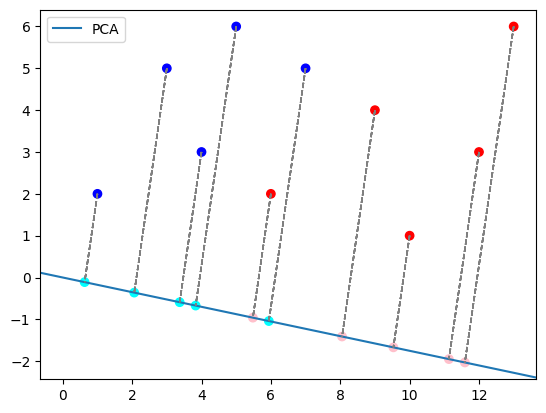

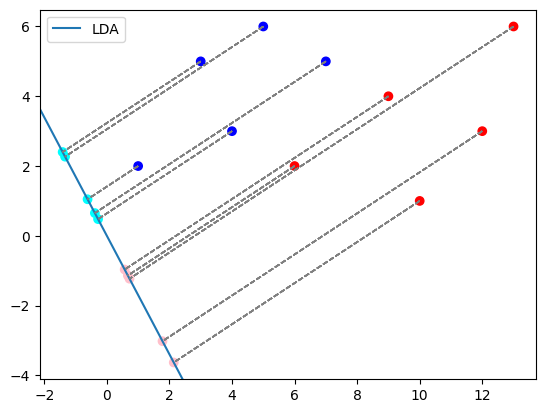

In [24]:
plot_reduced_points(X,y,X_bar_pca,pca.chosen,label="PCA")

plt.legend()
plt.show()   

plot_reduced_points(X,y,X_bar_lda,lda.chosen,label="LDA")

plt.legend()
plt.show()

### Question 2

In [25]:
gender_df=pd.read_csv('./gender.csv',index_col=0)
columns=['class']
columns.extend(gender_df.columns[1:])
gender_df.columns=columns
display(gender_df.shape)

training_df=gender_df.groupby('class').tail(390)
test_df=gender_df.groupby('class').head(10)

new_dim=65

X_train=training_df.drop(['class'],axis=1).to_numpy()
y_train=training_df['class'].to_numpy()
X_test=test_df.drop(['class'],axis=1).to_numpy()
y_test=test_df['class'].to_numpy()


lda=LDA(new_dim)
lda.fit(X_train,y_train)

X_train_bar=lda.transform(X_train)
X_test_bar=lda.transform(X_test)
print("Reduced Dimension = ",new_dim)

(800, 129)

Reduced Dimension =  65


In [26]:
nb = GaussianNB()

nb.fit(X_train_bar, y_train)

y_pred = nb.predict(X_test_bar)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")
display(pd.DataFrame([y_pred,y_test],index=['Prediction','True']))

Accuracy: 95.0%


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Prediction,male,male,male,male,male,male,male,male,male,male,male,female,female,female,female,female,female,female,female,female
True,male,male,male,male,male,male,male,male,male,male,female,female,female,female,female,female,female,female,female,female


### Question 3

In [27]:
face_df=pd.read_csv('./face_data.csv')

display(face_df.shape)

training_df=face_df.groupby('target').head(8)
test_df=face_df.groupby('target').tail(2)

X_train=training_df.drop(['target'],axis=1).to_numpy()
y_train=training_df['target'].to_numpy()
X_test=test_df.drop(['target'],axis=1).to_numpy()
y_test=test_df['target'].to_numpy()

new_dim=105
lda=LDA(new_dim)
lda.fit(X_train,y_train)

X_train_bar=lda.transform(X_train)
X_test_bar=lda.transform(X_test)
print("Reduced Dimension = ",new_dim)

(400, 4097)

Reduced Dimension =  105


In [28]:
nb = GaussianNB()

nb.fit(X_train_bar, y_train)

y_pred = nb.predict(X_test_bar)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")
display(pd.DataFrame([y_pred,y_test],index=['Prediction','True']))

Accuracy: 70.0%


,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Prediction,4,25,1,1,20,2,3,11,4,8,...,24,5,36,36,28,37,38,38,3,39
True,0,0,1,1,2,2,3,3,4,4,...,35,35,36,36,37,37,38,38,39,39
